<a href="https://colab.research.google.com/github/cruzr-github/Cloud_curious/blob/master/Publicidades.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import files
files.upload()

Saving datasets_advertising.csv to datasets_advertising.csv


{'datasets_advertising.csv': b'TV,Radio,Newspaper,Sales\r\n230.1,37.8,69.2,22.1\r\n44.5,39.3,45.1,10.4\r\n17.2,45.9,69.3,12\r\n151.5,41.3,58.5,16.5\r\n180.8,10.8,58.4,17.9\r\n8.7,48.9,75,7.2\r\n57.5,32.8,23.5,11.8\r\n120.2,19.6,11.6,13.2\r\n8.6,2.1,1,4.8\r\n199.8,2.6,21.2,15.6\r\n66.1,5.8,24.2,12.6\r\n214.7,24,4,17.4\r\n23.8,35.1,65.9,9.2\r\n97.5,7.6,7.2,13.7\r\n204.1,32.9,46,19\r\n195.4,47.7,52.9,22.4\r\n67.8,36.6,114,12.5\r\n281.4,39.6,55.8,24.4\r\n69.2,20.5,18.3,11.3\r\n147.3,23.9,19.1,14.6\r\n218.4,27.7,53.4,18\r\n237.4,5.1,23.5,17.5\r\n13.2,15.9,49.6,5.6\r\n228.3,16.9,26.2,20.5\r\n62.3,12.6,18.3,9.7\r\n262.9,3.5,19.5,17\r\n142.9,29.3,12.6,15\r\n240.1,16.7,22.9,20.9\r\n248.8,27.1,22.9,18.9\r\n70.6,16,40.8,10.5\r\n292.9,28.3,43.2,21.4\r\n112.9,17.4,38.6,11.9\r\n97.2,1.5,30,13.2\r\n265.6,20,0.3,17.4\r\n95.7,1.4,7.4,11.9\r\n290.7,4.1,8.5,17.8\r\n266.9,43.8,5,25.4\r\n74.7,49.4,45.7,14.7\r\n43.1,26.7,35.1,10.1\r\n228,37.7,32,21.5\r\n202.5,22.3,31.6,16.6\r\n177,33.4,38.7,17.1\r\n293.6,27

In [ ]:
 #Cargar el dataset
data = pd.read_csv('datasets_advertising.csv')
data.head()


,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,12.0
3,151.5,41.3,58.5,16.5
4,180.8,10.8,58.4,17.9


In [ ]:
#Importar librerías
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np


/usr/local/lib/python3.6/dist-packages/seaborn/axisgrid.py:2071: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


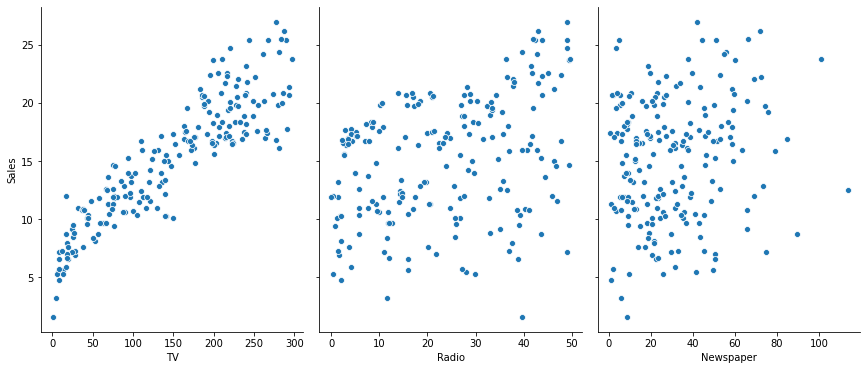

In [ ]:
#Visualización del dataset
sns.pairplot(data, x_vars=['TV','Radio','Newspaper'], y_vars='Sales', size=5,aspect=0.8)

/usr/local/lib/python3.6/dist-packages/seaborn/axisgrid.py:2071: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


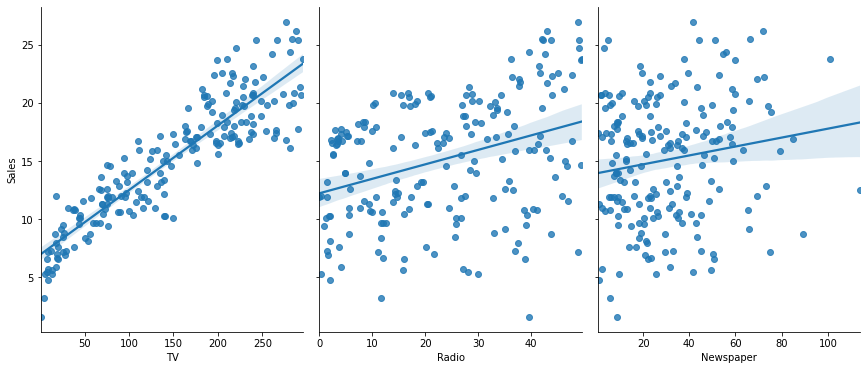

In [ ]:
#Visualización 2
sns.pairplot(data, x_vars=['TV','Radio','Newspaper'], y_vars='Sales', size=5,aspect=0.8,kind='reg')

In [ ]:
#Separamos el dataset en variables independientes 'X' y en la variable dependiente 'y'
X = data.iloc[:, :-1].values
y = data.iloc[:, 3].values

In [ ]:
#Separamos la variable dependiente en entrenamiento 'X_train' y testeo 'X_test', de igual forma con la variable dependiente 'y_train' y 'y_test'
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

In [ ]:
#Visualizamos como nos quedó dividido el dataset
print (X_train.shape)
print (X_test.shape)
print (y_train.shape)
print (y_test.shape)

(160, 3)
(40, 3)
(160,)
(40,)


In [ ]:
#Realizamos la regresión lineal
from sklearn.linear_model import LinearRegression
linreg = LinearRegression()
linreg.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [ ]:
#Visualizamos los coeficientes de cada una de la variable
feature_columns = ['TV','Radio','Newspaper']
print(pd.DataFrame({"Variables": feature_columns, "Coeficiente": linreg.coef_}))

   Variables  Coeficiente
0         TV     0.053680
1      Radio     0.111526
2  Newspaper    -0.003512


In [ ]:
#Realizamos las predicciones de 'y' correspondientes a las variables independientes de testeo 'X_test'
y_pred = linreg.predict(X_test)

In [ ]:
from sklearn import metrics


In [ ]:
#Calculamos el error cuadrático medio con el modelo de tres variables (TV, Radio, Newspaper)
MSE = str(np.sqrt(metrics.mean_squared_error(y_test,y_pred)))
R2 = str(np.sqrt(metrics.r2_score(y_test,y_pred)))

print('Error cuadrático medio: ' + MSE)
print('R2: ' + R2)

Error cuadrático medio: 2.126629389912894
R2: 0.9297878211703854


In [ ]:
#Ahora realizamos los mismos calculos pero utilizando únicamente las variables TV y Radio, eliminando Newspapers ya que su aporte a las Ventas es muy bajo
X = data.iloc[:, :-2].values

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

In [ ]:
linreg = LinearRegression()
linreg.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [ ]:
feature_columns = ['TV','Radio']
print(pd.DataFrame({"Variables": feature_columns, "Coeficiente": linreg.coef_}))


  Variables  Coeficiente
0        TV     0.053595
1     Radio     0.109898


In [ ]:
y_pred = linreg.predict(X_test)

In [ ]:
#Calculamos el error cuadrático medio y R2 con el modelo de dos variables (TV, Radio)
MSE = str( np.sqrt(metrics.mean_squared_error(y_test,y_pred)))
R2 = str(np.sqrt(metrics.r2_score(y_test,y_pred)))

print('Error cuadrático medio: ' + MSE)
print('R2: ' + R2)

Error cuadrático medio: 2.1158493250248576
R2: 0.9305243565390166


(200, 200)


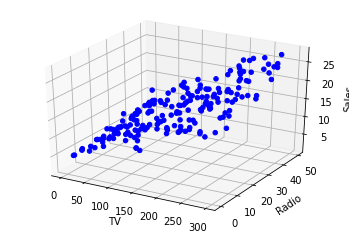

In [ ]:
#Visualizamos la relación entre TV, Radio y Sales
xx, yy = np.meshgrid(data.TV, data.Radio)

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

x_surf = np.arange(0, 350, 20)                # generar una malla
y_surf = np.arange(0, 60, 4)
x_surf, y_surf = np.meshgrid(x_surf, y_surf)

exog = pd.core.frame.DataFrame({'TV': x_surf.ravel(), 'radio': y_surf.ravel()})

print(xx.shape)

ax.scatter(data.TV, data.Radio, data.Sales,
           c='blue',
           marker='o',
           alpha=1)

ax.set_xlabel('TV')
ax.set_ylabel('Radio')
ax.set_zlabel('Sales')

plt.show()